In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [2]:
x=iris.petal_length.values

In [3]:
sns.lugplot(x)

AttributeError: module 'seaborn' has no attribute 'lugplot'

<AxesSubplot:ylabel='Density'>

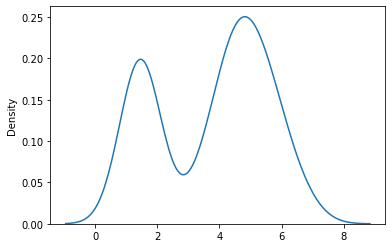

In [4]:
sns.kdeplot(x)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

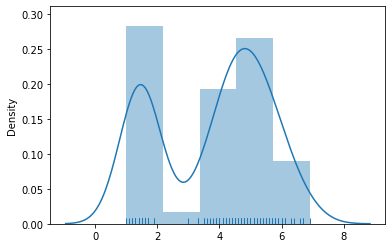

In [5]:
sns.distplot(x,rug=True)

In [6]:
#countplot은 데이터 프레임에 대해서 사용 가능

<AxesSubplot:xlabel='class', ylabel='count'>

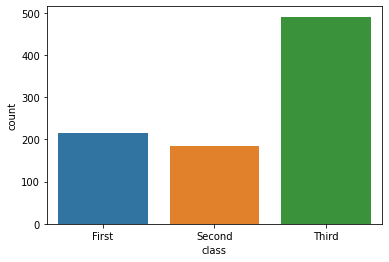

In [7]:
sns.countplot(x='class',data=titanic)

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='count'>

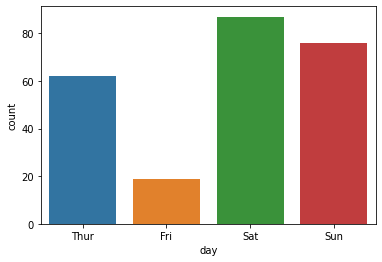

In [9]:
sns.countplot(x='day',data=tips)

In [23]:
#데이터가 2차원, 실수->스캐터 플롯
#스캐터플롯+히스토그램=>조인트플롯

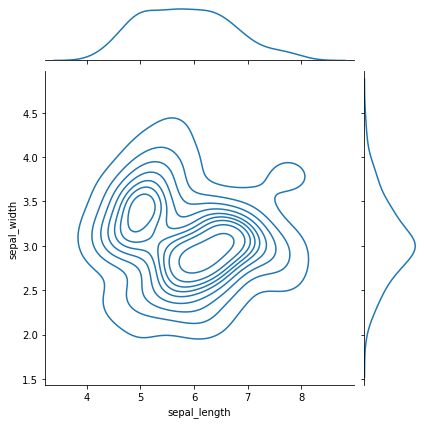

In [25]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris,kind='kde')

In [26]:
#데이터 2차원+카테고리형=>heatmap


In [27]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
#퀴즈1

NameError: name '퀴즈1' is not defined

In [29]:
titanic.groupby(['class','sex']).count().unstack()

survived      pclass         age       sibsp       parch       ...  \
sex      female male female male female male female male female male  ...   
class                                                                 ...   
First        94  122     94  122     85  101     94  122     94  122  ...   
Second       76  108     76  108     74   99     76  108     76  108  ...   
Third       144  347    144  347    102  253    144  347    144  347  ...   

       adult_male        deck      embark_town       alive       alone       
sex        female male female male      female male female male female male  
class                                                                        
First          94  122     81   94          92  122     94  122     94  122  
Second         76  108     10    6          76  108     76  108     76  108  
Third         144  347      6    6         144  347    144  347    144  347  

[3 rows x 26 columns]

In [31]:

titanic.groupby(['class','sex']).size().unstack()

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [34]:
ts=titanic.pivot_table(index='class',columns='sex',aggfunc='size')

In [36]:
ts

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


<AxesSubplot:xlabel='sex', ylabel='class'>

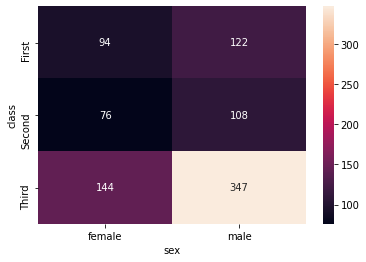

In [43]:
sns.heatmap(ts,annot=True,fmt='d')  #annot=True,fmt='d'옵션

#http://seaborn.pydata.org/generated/seaborn.heatmap.html (참고)

In [44]:
#2차원, 실수, 카테고리가 섞여있는 데이터 시각화

<AxesSubplot:xlabel='day', ylabel='total_bill'>

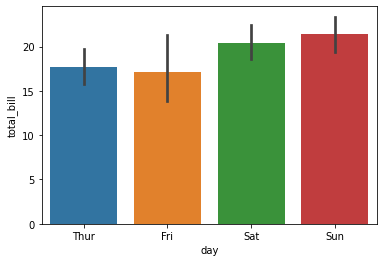

In [45]:
sns.barplot(x='day',y='total_bill',data=tips)
#평균: 막대의 높이, 에러바: 편차

<AxesSubplot:xlabel='day', ylabel='total_bill'>

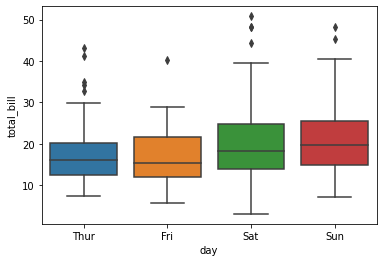

In [47]:
sns.boxplot(x='day',y='total_bill',data=tips)
#outliers:이상치, 극단치, 예외치

In [48]:
#iqr=q3(3사분위수)-q1(1사분위수)
#maximum=q3+iqr*1.5 (이걸 넘어가면 극단치)

In [49]:
#maximum=q3_iqr*1.5
#maximum=q1-iqr*1.5
#https://en.wikipedia.org/wiki/Interquartile_range  참고

NameError: name 'q3_iqr' is not defined

<AxesSubplot:xlabel='day', ylabel='total_bill'>

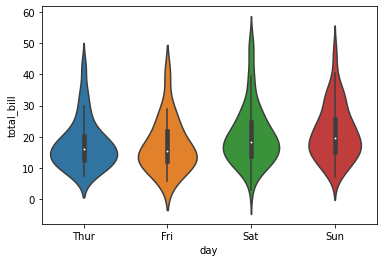

In [50]:
sns.violinplot(x='day',y='total_bill',data=tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

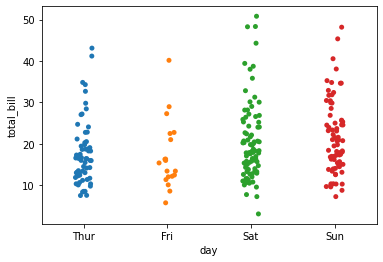

In [52]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)
# jitter=True : 겹쳐진 데이터를 겹치지 않도록 설정

<AxesSubplot:xlabel='day', ylabel='total_bill'>

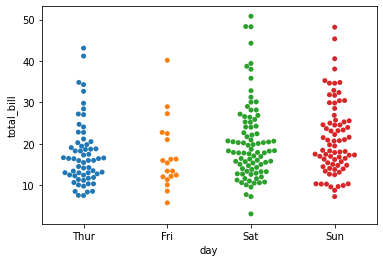

In [54]:
sns.swarmplot(x='day',y='total_bill',data=tips)  
#swarmplot :겹친 데이터를 안겹치게 보여지는 플랏

<AxesSubplot:xlabel='day', ylabel='total_bill'>

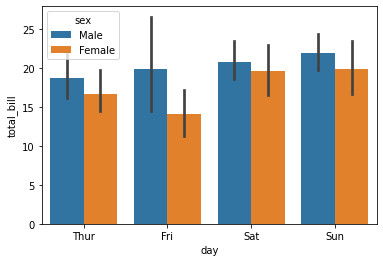

In [58]:
sns.barplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

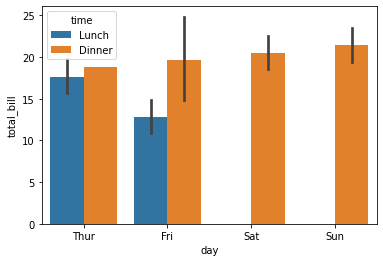

In [59]:
sns.barplot(x='day',y='total_bill',data=tips,hue='time')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

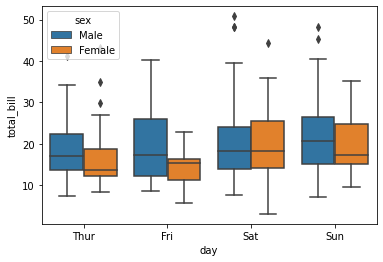

In [60]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

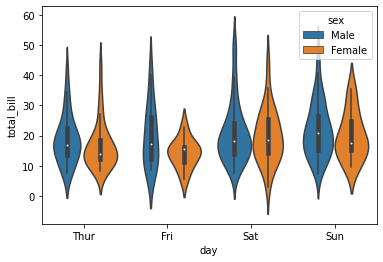

In [61]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

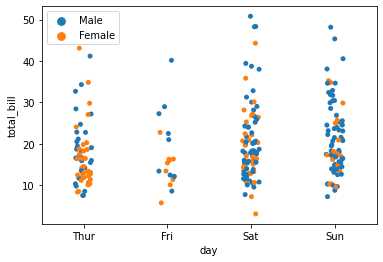

In [67]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')
plt.legend(loc=2)  #범례위치 설정

In [68]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [71]:
fp=flights.pivot('month','year','passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

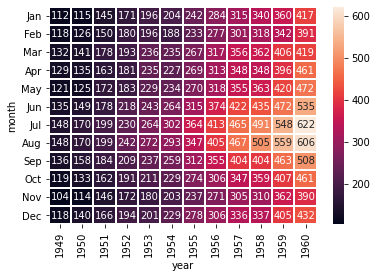

In [73]:
sns.heatmap(fp,annot=True,fmt='d',linewidths=1)

In [74]:
# 시각화시 막대그래프 그리는 방법(seaborn, matplot, pandas, ggplot2)

In [75]:
import random

In [76]:
np.random.seed(1)

In [77]:
groupList=['A','B','C','D']
nSize=20

In [81]:
group=[random.choice(groupList) for i in range(nSize)]
group

['C',
 'D',
 'D',
 'A',
 'B',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'B',
 'B',
 'B',
 'C',
 'B',
 'A',
 'C',
 'B']

In [89]:
xval=np.random.poisson(lam=10,size=nSize)
#포아송 분포로부터 무작위 표본 추출
#일정 시간(공간)에서 무작위로 발생하는 사건으 ㅣ평균 횟수가 람다(lam)

In [90]:
label=np.random.binomial(n=1, p=0.5, size=nSize)
label
#이항분포에서 무작위 표본추출
#이항분포? 실험을 반복적으로 시행->두 가지 경우(성공/실패
#성공확률 p인 베르누이 시행을 n번 반복했을 때 
#성공하는 횟수를 x, 확률 변수 x는 모수 n과 p의 이항분포를 따른다


#확률분포: 이산형, 연속형 확률 분포
#이산형 확률 분호: 이항분호, 포아송분포, 초기화 분포
#연속 확률 분포 : 정규 분호, t분포, f분포, 카이제곱..

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [91]:
label=list(map(str, label))

In [92]:
df=pd.DataFrame({'xval':xval, 'group':group, 'label': label})
df

,xval,group,label
0,14,C,0
1,12,D,0
2,8,D,0
3,12,A,0
4,9,B,0
5,9,C,1
6,15,C,1
7,8,D,0
8,14,D,0
9,15,D,1


In [97]:
#퀴즈2 
#group 컬럼을 기준으로 그룹화 한 다름 xval의 합계
df_group=df.groupby('group')[['xval']].sum()

In [102]:
df_group_label=df.groupby(['group','label'])[['xval']].sum()

In [103]:
df_group_label

xval
group label      
A     0        12
      1        13
B     0        41
      1        25
C     0        43
      1        36
D     0        42
      1        15

In [104]:
#pandas.DataFrame.plot.bar()
df_group=

In [107]:
df_group.plot.bar(rot=0,y='xval',x='group')

KeyError: 'group'

In [108]:
pip install plotnine

     |████████████████████████████████| 4.7 MB 123 kB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 401 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 394 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 83 kB/s eta 0:00:011
     |████████████████████████████████| 111 kB 353 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [113]:
import plotnine as p9

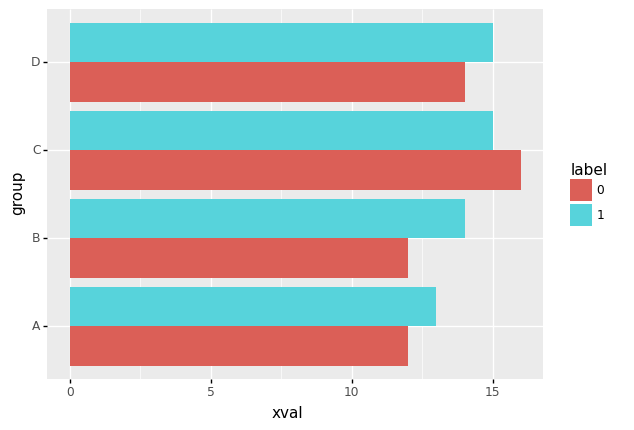

<ggplot: (8767176885209)>

In [121]:
p9.ggplot(data=df,mapping=p9.aes(x='group',y='xval',fill='label'))+p9.geom_bar(stat='identity',position='dodge')+p9.coord_flip()

In [115]:
df

,xval,group,label
0,14,C,0
1,12,D,0
2,8,D,0
3,12,A,0
4,9,B,0
5,9,C,1
6,15,C,1
7,8,D,0
8,14,D,0
9,15,D,1


In [122]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


<AxesSubplot:>

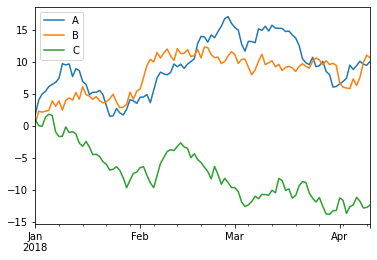

In [123]:
df1.plot()

<AxesSubplot:>

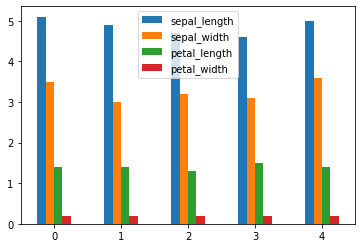

In [128]:
iris[:5].plot(kind='bar',rot=0)

In [132]:
df2=iris.groupby(iris.species).mean()

In [136]:
df3=df2.T

<AxesSubplot:xlabel='species'>

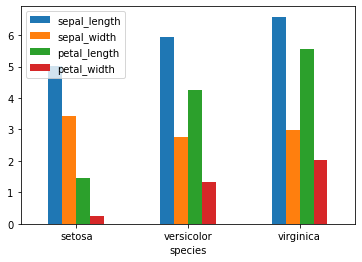

In [134]:
df2.plot.bar(rot=0)

<AxesSubplot:>

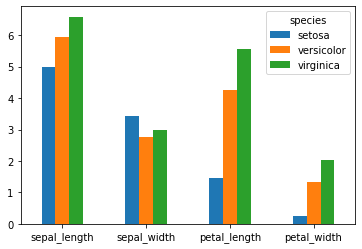

In [137]:
df3.plot.bar(rot=0)

In [138]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [142]:
df3=titanic.pclass.value_counts()
#선실별 승객 비율
df3

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:ylabel='pclass'>

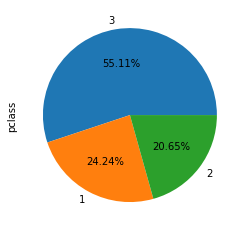

In [143]:
df3.plot.pie(autopct='%.2f%%')